# 이미지 전처리

## 이미지 사이즈 체크

            width      height
count  900.000000  900.000000
mean   479.595556  479.595556
std     12.133333   12.133333
min    116.000000  116.000000
25%    480.000000  480.000000
50%    480.000000  480.000000
75%    480.000000  480.000000
max    480.000000  480.000000


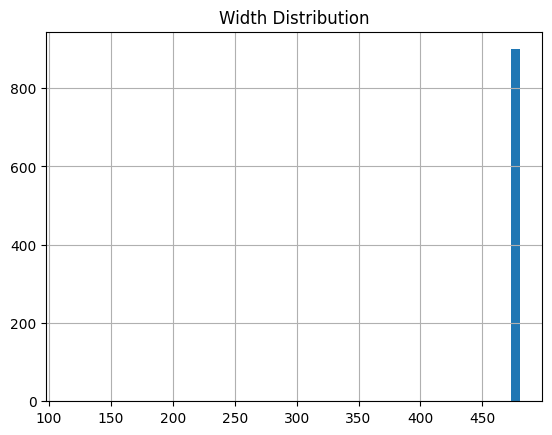

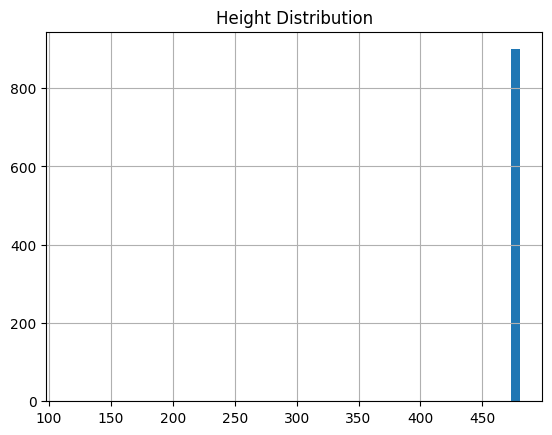

In [ ]:
import os
from PIL import Image
import pandas as pd

# 본인 환경 맞게 수정
dst_base = "C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/preprocessed/images"

image_data = []

for uuid_folder in os.listdir(dst_base):
    uuid_path = os.path.join(dst_base, uuid_folder)
    if os.path.isdir(uuid_path):
        for file_name in os.listdir(uuid_path):
            file_path = os.path.join(uuid_path, file_name)
            try:
                with Image.open(file_path) as img:
                    w, h = img.size
                    image_data.append({"uuid": uuid_folder, "file": file_name, "width": w, "height": h})
            except Exception:
                continue

df_img = pd.DataFrame(image_data)

# 사이즈 분포 요약
print(df_img.describe())

# 히스토그램 예시
import matplotlib.pyplot as plt
df_img["width"].hist(bins=50)
plt.title("Width Distribution")
plt.show()

df_img["height"].hist(bins=50)
plt.title("Height Distribution")
plt.show()

## 이미지 폴더 이동

In [ ]:
import os
import shutil
import pandas as pd

# CSV 로드
csv_path = "C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/preprocessed/bungaejangter_cleaned.csv"
df = pd.read_csv(csv_path)

# uuid 컬럼이 있다고 가정
uuids = df["id"].dropna().unique()

src_base = "C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/raw/images"
dst_base = "C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/preprocessed/images"

# 목적지 폴더 없으면 생성
os.makedirs(dst_base, exist_ok=True)

for uid in uuids:
    src = os.path.join(src_base, str(uid))
    dst = os.path.join(dst_base, str(uid))

    if os.path.exists(src):
        print(f"복사: {src} -> {dst}")
        shutil.copytree(src, dst)  # 이동
    else:
        print(f"폴더 없음: {src}")


복사: C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/raw/images\356fcf58-2382-46c5-b404-397e30c5e2a5 -> C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/preprocessed/images\356fcf58-2382-46c5-b404-397e30c5e2a5
복사: C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/raw/images\524cfe75-cfaf-4bb5-b7c7-b35ed450449f -> C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/preprocessed/images\524cfe75-cfaf-4bb5-b7c7-b35ed450449f
복사: C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/raw/images\47a9e080-0f62-4d21-baa2-2dfe1c2e00f0 -> C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/preprocessed/images\47a9e080-0f62-4d21-baa2-2dfe1c2e00f0
복사: C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/raw/images\1b85438b-77d0-4867-a551-48d59e4cf5a4 -> C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/preprocessed/images\1b85438b-77d0-4867-a551-48d59e4cf5a4
복사: C:/Potenup/SecondHanded-Strollers-PredictedPrice/data/raw/images\caf9be30-5843-4d6d-aaab-8401592ab334 -> C:/Potenup/

## 이미지 크롭

In [ ]:
from PIL import Image, ImageOps

def make_square(img: Image.Image, pad_color=(114,114,114), crop_threshold: float = 1.2):
    """
    이미지를 원본 크기 기반으로 정사각형으로 맞춤
    - 비율 차이가 crop_threshold 이상이면 중앙 크롭
    - 아니면 패딩 추가
    """
    w, h = img.size
    aspect_ratio = max(w/h, h/w)

    if aspect_ratio > crop_threshold:
        # 중앙 크롭 (긴 쪽 잘라내기)
        min_dim = min(w, h)
        left = (w - min_dim) // 2
        top = (h - min_dim) // 2
        right = left + min_dim
        bottom = top + min_dim
        return img.crop((left, top, right, bottom))
    else:
        # 패딩으로 맞춤 (긴 쪽에 맞춰서 정사각)
        max_dim = max(w, h)
        return ImageOps.pad(img, (max_dim, max_dim), color=pad_color, method=Image.BICUBIC)
